In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [131]:
df = pd.read_csv('/content/WHO-COVID-19-global-data.csv')
country_name = 'India'

In [132]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [133]:
df_country = df[ df['Country']==country_name ]
df_country_date = df_country[ '2020-03-01' <= df_country['Date_reported']]
df_country_date = df_country_date[ df_country_date['Date_reported'] <= '2021-02-29']
df_country_date


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
39706,2020-03-01,IN,India,SEARO,0,7,0,0
39707,2020-03-02,IN,India,SEARO,2,9,0,0
39708,2020-03-03,IN,India,SEARO,0,9,0,0
39709,2020-03-04,IN,India,SEARO,22,31,0,0
39710,2020-03-05,IN,India,SEARO,1,32,0,0
...,...,...,...,...,...,...,...,...
40056,2021-02-14,IN,India,SEARO,12194,10904940,92,155642
40057,2021-02-15,IN,India,SEARO,11649,10916589,90,155732
40058,2021-02-16,IN,India,SEARO,9121,10925710,81,155813
40059,2021-02-17,IN,India,SEARO,11610,10937320,100,155913


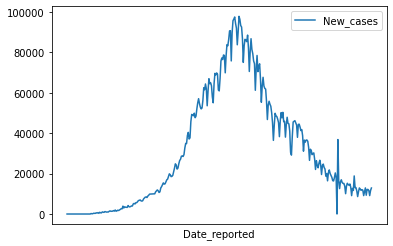

In [134]:
df_country_date.plot(x="Date_reported", y="New_cases", kind="line")
plt.xticks(())
plt.show()


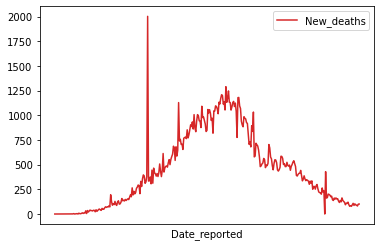

In [135]:
df_country_date.plot(x="Date_reported", y="New_deaths", kind="line", color='C3')
plt.xticks(())
plt.show()


In [136]:
class LinearRegression:
  m = None
  c = None
  theta = None
  def fit(self, X, Y):
    # (X.T X)^-1 . X.T Y
    A = np.matmul(X.T, X)
    B = np.matmul(X.T, Y)
    result = np.linalg.solve(A, B)
    self.m = result[0][0]
    self.c = result[1][0]
    self.theta = result
    print(f"W0 : {self.m}")
    print(f"W1 : {self.c}")
    
    return self.m, self.c

  def predict(self, X):
    return np.matmul(self.theta.T, X.T).T

  def validationError(self, X, Y):
    error = np.mean(np.square((Y - self.predict(X))))
    return error

  def displayLine(self, X, Y):
    print(f"Equation of line => y = {self.m}x + {self.c}")
    plt.scatter(X, Y,  color='black')
    sorted_X = np.sort(X)
    sorted_Y = self.predict(sorted_X)
    plt.plot(sorted_X, sorted_Y, color='blue', linewidth=3)
    plt.show()

In [137]:
df_input = df_country[ '2020-05-01' <= df_country['Date_reported']]
df_input = df_input[ df_input['Date_reported'] <= '2020-07-31']
df_input.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
39767,2020-05-01,IN,India,SEARO,1993,35043,73,1147
39768,2020-05-02,IN,India,SEARO,2293,37336,71,1218
39769,2020-05-03,IN,India,SEARO,2644,39980,83,1301
39770,2020-05-04,IN,India,SEARO,2553,42533,72,1373
39771,2020-05-05,IN,India,SEARO,3900,46433,195,1568


In [138]:
df_input['Date_reported'] = pd.to_datetime(df_input['Date_reported'])
df_input['Date_reported'] = df_input['Date_reported'].map(dt.datetime.toordinal)
df_input.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
39767,737546,IN,India,SEARO,1993,35043,73,1147
39768,737547,IN,India,SEARO,2293,37336,71,1218
39769,737548,IN,India,SEARO,2644,39980,83,1301
39770,737549,IN,India,SEARO,2553,42533,72,1373
39771,737550,IN,India,SEARO,3900,46433,195,1568


In [139]:
df_test = df_country[ '2020-08-01' <= df_country['Date_reported']]
df_test = df_test[ df_test['Date_reported'] <= '2020-08-31']
df_test['Date_reported'] = pd.to_datetime(df_test['Date_reported'])
df_test['Date_reported'] = df_test['Date_reported'].map(dt.datetime.toordinal)
df_test.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
39859,737638,IN,India,SEARO,57118,1695988,764,36511
39860,737639,IN,India,SEARO,54735,1750723,853,37364
39861,737640,IN,India,SEARO,52972,1803695,771,38135
39862,737641,IN,India,SEARO,52050,1855745,803,38938
39863,737642,IN,India,SEARO,52509,1908254,857,39795


In [140]:
X_input = df_input['Date_reported'].to_numpy().reshape(-1,1)
X_input = np.c_[np.ones(X_input.shape[0]), X_input]

Y_input = df_input['New_deaths'].to_numpy().reshape(-1,1)

X_test = df_test['Date_reported'].to_numpy().reshape(-1,1)
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

Y_test = df_test['New_deaths'].to_numpy().reshape(-1,1)

lr = LinearRegression()
lr.fit(X_input, Y_input)


W0 : -5775813.4239056
W1 : 7.831150852931984


(-5775813.4239056, 7.831150852931984)

In [141]:
predicted_list = lr.predict(X_test)
df_test['predicted_deaths'] = predicted_list
df_test[['Date_reported','New_deaths','predicted_deaths']]

,Date_reported,New_deaths,predicted_deaths
39859,737638,764,741.028949
39860,737639,853,748.860100
39861,737640,771,756.691251
39862,737641,803,764.522402
39863,737642,857,772.353553
39864,737643,904,780.184704
39865,737644,886,788.015855
39866,737645,933,795.847005
39867,737646,861,803.678156
39868,737647,1007,811.509307


In [142]:
print(f"Validation Error : {lr.validationError(X_test, Y_test)}")

Validation Error : 9389.214696106315
